In [ ]:
"""
Застосуйте описані в лекції методи трансформації даних на датасеті Data_to_Transform, що міститься на GitHub в папці лекції. 
Цей датасет містить чотири колонки, що відповідають:

1. помірно зміщеним вправо даним (Moderate Positive Skew)
2. сильно зміщеним вправо даним (Highly Positive Skew)
3. помірно зміщеним вліво даним (Moderate Negative Skew)
4. сильно зміщеним вліво даним (Highly Negative Skew) Оцініть результати трансформацій через квантильно-квантильні графіки.
"""

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv('Data_to_Transform.csv')
df.head(10)

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
5,1.342577,3.018138,10.720679,8.977754
6,1.359727,3.026771,10.718358,8.969744
7,1.404696,3.028970,10.667741,8.962335
8,1.409988,3.045471,10.658861,8.957279
9,1.420835,3.047525,10.643465,8.950892


array([[<Axes: title={'center': 'Moderate Positive Skew'}>]], dtype=object)

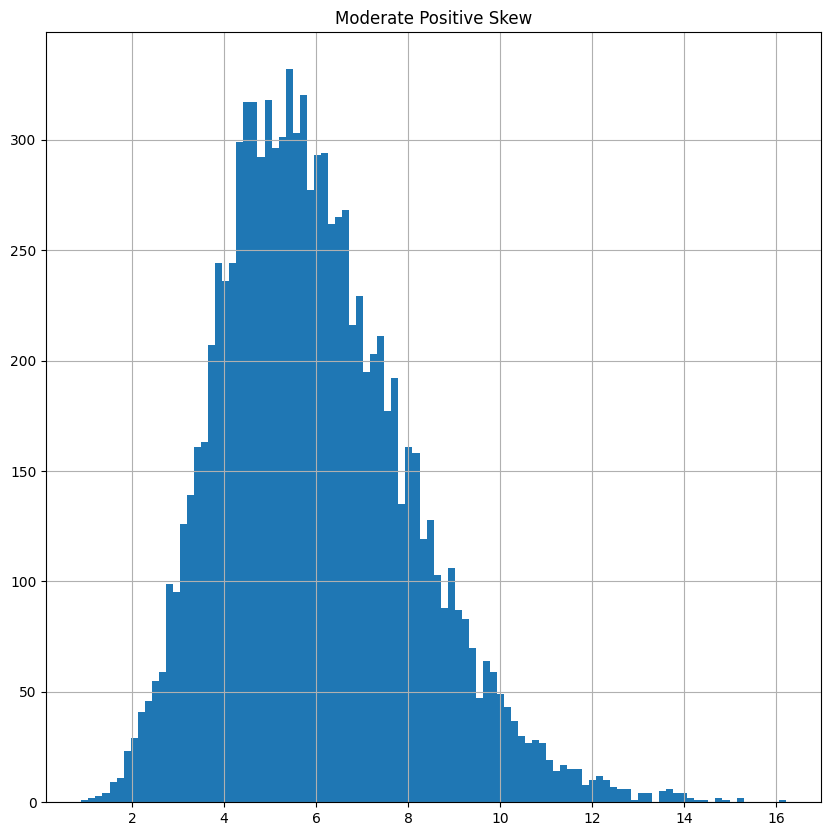

In [35]:
# Графік помірно зміщеним вправо даним (Moderate Positive Skew)
df.hist(column='Moderate Positive Skew', figsize=(10, 10), bins=100)

array([[<Axes: title={'center': 'Highly Positive Skew'}>]], dtype=object)

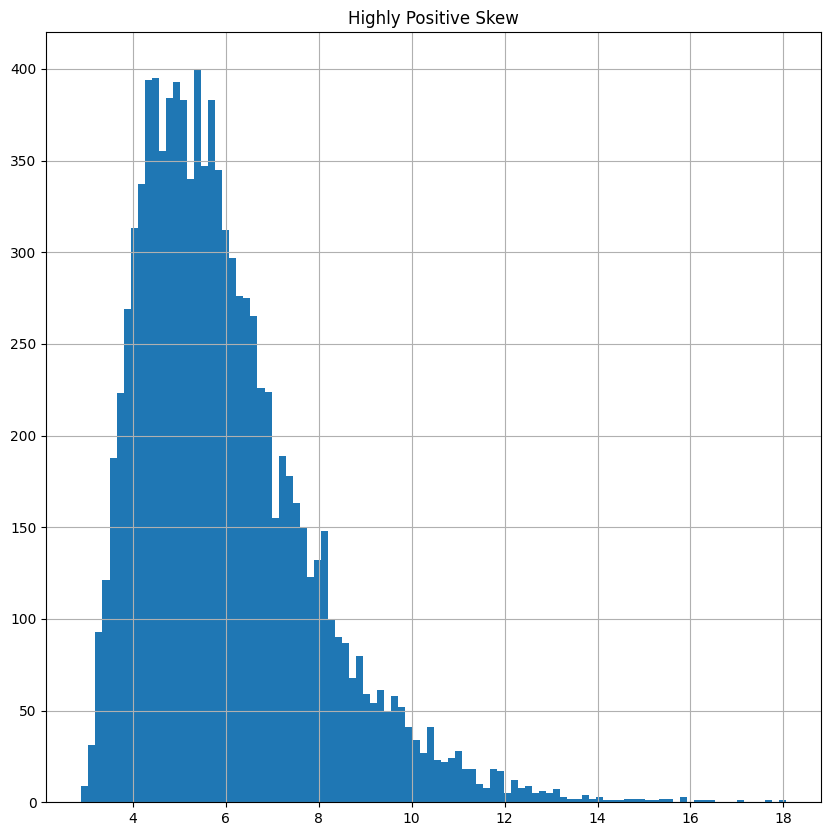

In [37]:
# Графік сильно зміщеним вправо даним (Highly Positive Skew)
df.hist(column='Highly Positive Skew', figsize=(10, 10), bins=100)

array([[<Axes: title={'center': 'Moderate Negative Skew'}>]], dtype=object)

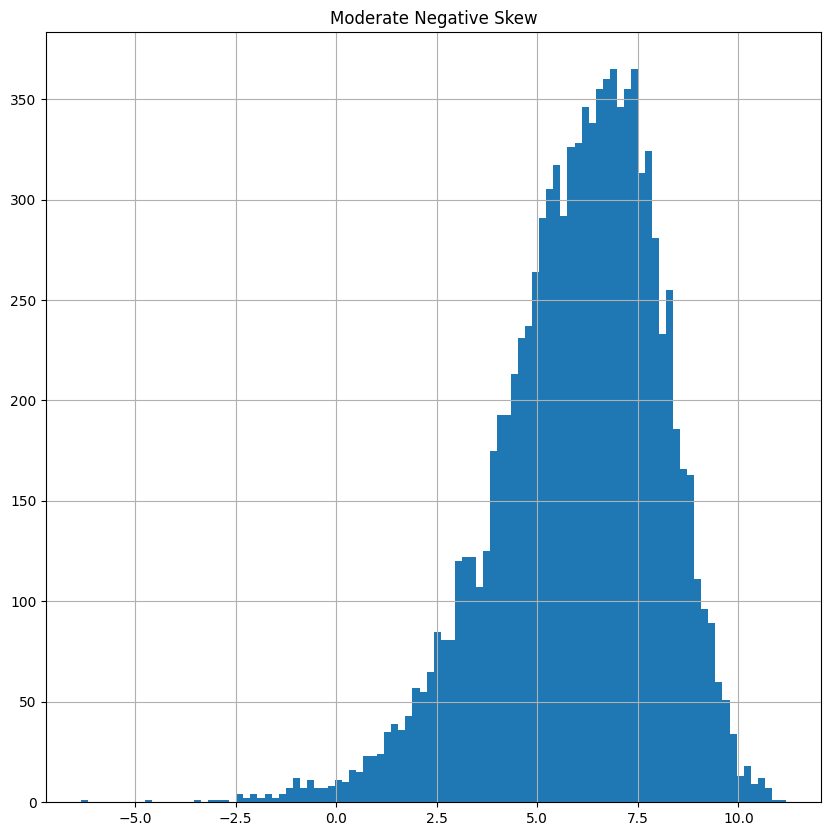

In [39]:
# Графік помірно зміщеним вліво даним (Moderate Negative Skew)
df.hist(column='Moderate Negative Skew', figsize=(10, 10), bins=100)

array([[<Axes: title={'center': 'Highly Negative Skew'}>]], dtype=object)

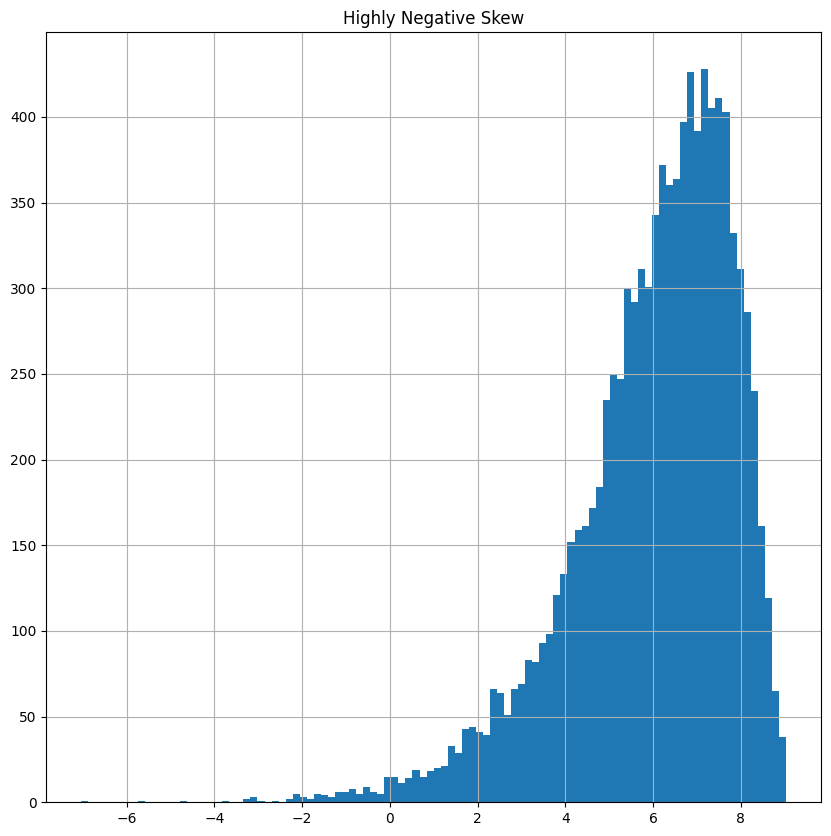

In [41]:
# Графік сильно зміщеним вліво даним (Highly Negative Skew)
df.hist(column='Highly Negative Skew', figsize=(10, 10), bins=100)

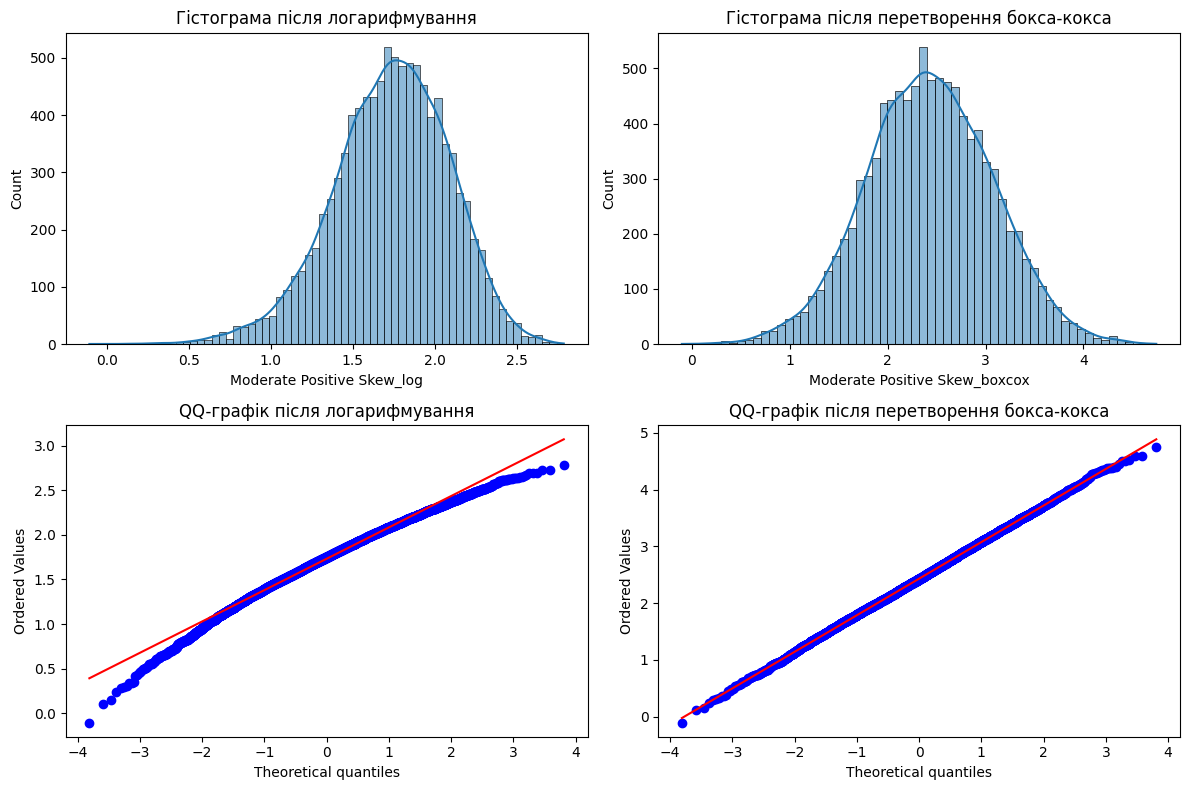

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Застосування логарифмування
df['Moderate Positive Skew_log'] = np.log(df['Moderate Positive Skew'])

# Відображення графіка histplot та qqplot після логарифмування
sns.histplot(df['Moderate Positive Skew_log'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Гістограма після логарифмування')
stats.probplot(df['Moderate Positive Skew_log'], plot=axes[1, 0])
axes[1, 0].set_title('QQ-графік після логарифмування')

# Застосування перетворення бокса-кокса
df['Moderate Positive Skew_boxcox'], _ = stats.boxcox(df['Moderate Positive Skew'])

# Відображення графіка histplot та qqplot після перетворення бокса-кокса
sns.histplot(df['Moderate Positive Skew_boxcox'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Гістограма після перетворення бокса-кокса')
stats.probplot(df['Moderate Positive Skew_boxcox'], plot=axes[1, 1])
axes[1, 1].set_title('QQ-графік після перетворення бокса-кокса')

# Відображення графіків
plt.tight_layout()
plt.show()